## Importing Libraries

In [24]:
from sklearn import datasets ### I have loaded dataset from sklearn. It is same as the dataset in the mentioned 
                            ###  online repository
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Helper Functions

### Function to calculate Misclassification Rate (MCR) 

In [26]:
def calculate_error(data,s_feature,target_feature):
    errors=[]
    vals = np.unique(data[s_feature])
    
    for val in vals:
        ys = data[data[s_feature]==val]
        ns = data[data[s_feature]!=val]
        
        ys_count = Counter(ys[target_feature])
        ys_class = ys_count.most_common(1)[0][0]
        error_ys = len(ys[ys[target_feature] !=ys_class])
        
        ns_count = Counter(ns[target_feature])
        ns_class = ns_count.most_common(1)[0][0]
        error_ns = len(ns[ns[target_feature] !=ns_class])
        total_Erros = error_ys+error_ns
        errors.append(total_Erros)
    return np.min(errors)

### Function that builds tree and perform split using Misclassification Rate (MCR) as quality criteria

In [27]:
def DT_MCR(data, originaldata, features, max_dept ,target_feature="target", parent = None, level=0): 
    
 
    if (len(np.unique(data[target_feature])) <= 1): ### checking if all the values are same if yes then we reached at a leaf
    
        elements,counts = np.unique(data[target_feature],return_counts = True)
        print('Level ',level)
        if elements ==0 :
            print('Count of 0 =',np.sum(counts))
        elif elements ==1 :
            print('Count of 1 =',np.sum(counts))
        elif elements ==2 :
            print('Count of 2 =',np.sum(counts))
        print('Reached Leaf Node ')
        print()
         
        return np.unique(data[target_feature])[0]
    
    elif len(data) == 0:### checking the data is empty or not
       
        return np.unique(orignaldata[target_feature])[0]
    
    elif len(features) == 0 :
        
        return parent[0]
    elif level==max_dept:
        c = Counter(data[target_feature])
        return c.most_common(1)[0][0]
    
    else :

        P_node = np.unique(data[target_feature])### put all the uniqe values of target in parent node
        
        values = []
        for ftr in features : ### loop over all the features
            v = calculate_error(data,ftr,target_feature) ### getting list of MCR of all features
            values.append(v)
        
        best_feature_index = np.argmin(values)### taking out the index of the feture which contains max information gain
        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}} ### using dictionaris to show my actual tree
        
        elements,counts = np.unique(data[target_feature],return_counts = True)
        print('Level ',level)  
        for i in range(len(elements)):
            if elements[i]==0 :
                print('count of 0  =',counts[i])
            elif elements[i]==1 :
                print('count of 1  =',counts[i])
            elif elements[i]==2 :
                print('count of 2  =',counts[i])
                
        plt.bar(elements, counts/len(data))
        plt.xticks(elements, ['setosa','versicolor','virginica'])
        plt.xlabel('Class')
        plt.ylabel('Probability')
        title = 'Probability of Each class At Level: ' + str(level+1)
        plt.title(title)
        
        plt.show()
      
        print('Splitting on feature: ',best_feature,' with MCR: ', values[best_feature_index])
        
        print()
        
        
        new_features = features 
        features=[]
        for i in new_features :###to remove the feature from feature list after split                     
                                                   
            if i != best_feature :                  
                features.append(i)
        level += 1       
        new_features=None 
        
        for vals in np.unique(data[best_feature]):### recursion of all diffrent values in that splitting feature
            
            value = vals
            sub_data = (data[data[best_feature] == value]).dropna()
            subtree = DT_MCR(sub_data, data, features, max_dept ,target_feature, P_node, level)
            tree[best_feature][value] = subtree
            
        return tree 

### Function to get prediction for given observation/row

In [28]:
def myprint(d, sr,val):
    keys = []
    vals = []
    
    for k, v in d.items():
        if isinstance(v, dict):
            keys=k
            vals = v
    
    if val is 3:
        key = list(d.keys())[0]
        fn = d[key][sr[key]]
        return fn
        
    if bool(keys):
        vl = sr[keys]
        valordict = vals[vl]
        
        if isinstance(valordict, dict):
            return myprint(valordict, sr, val=val+1)
        else:
            return valordict

### Function to split the dataset into train, validate, test set

In [29]:
def split(df,st):
    
    X = df
    X_copy = X.copy()
    train = X_copy.sample(frac=0.70, random_state=st)
    test = X_copy.drop(train.index)
    test_copy = test.copy()
    test = test_copy.sample(frac=0.50, random_state=st)
    validate = test_copy.drop(test.index)
    
    return train, validate , test

## Function to convert the numeric label to categorical

In [30]:
### This function make 4 bins of column data and convert them to categorical data accordingly.
### Here a -- represents -- => values ranges from 0 to 25 % of mean of column <= --
### Here b -- represents -- => values ranges from 25 to 50 % of mean of column <= --
### Here c -- represents -- => values ranges from 50 to 75 % of mean of column <= --
### Here d -- represents -- => values ranges from 75 to 100 % of mean of column <= --

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'

def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

### Function to load the dataset and convert it to categorical data

In [31]:
def load_dataset():
    iris = datasets.load_iris()

    df = pd.DataFrame(iris.data)
    df.columns = ["sl", "sw", 'pl', 'pw']
    y = pd.DataFrame(iris.target)
    y.columns = ['target']


    #Convert all columns to labelled data
    df['sepal_length'] = toLabel(df, 'sl')
    df['sepal_width'] = toLabel(df, 'sw')
    df['petal_length'] = toLabel(df, 'pl')
    df['petal_width'] = toLabel(df, 'pw')

    df.head()
    df.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)    
    df['target']=y                                                    # here i added the target column  in the data
    
    return df

# Exercise 1: Part A)

### load and train decison tree

In [32]:
df = load_dataset()
train,validate,test = split(df, st=5)

### Build decision trees with different depts [1 to 4], MCR  as Quality Criteria and test it on validation set 

<p> A bar plot make more sense to represent data if we have less number of classes. So I have used bar plot to show probability of each classe instead of histogram. </p>

#########-- Start --- Building tree with dept:  1  --- ###################

Level  0
count of 0  = 34
count of 1  = 39
count of 2  = 32


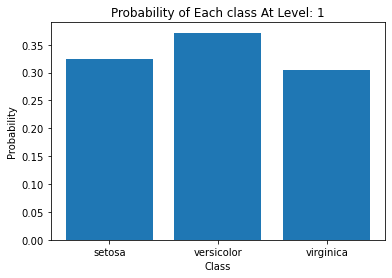

Splitting on feature:  petal_length  with MCR:  32

Level  1
Count of 0 = 34
Reached Leaf Node 

Level  1
Count of 1 = 7
Reached Leaf Node 

Level  1
Count of 2 = 17
Reached Leaf Node 


---------------------------------------------------------
Total loss:  0.45198512374305727  with dept of tree:  1
---------------------------------------------------------
###################--- Building tree with dept:  1  ---End -- ############


#########-- Start --- Building tree with dept:  2  --- ###################

Level  0
count of 0  = 34
count of 1  = 39
count of 2  = 32


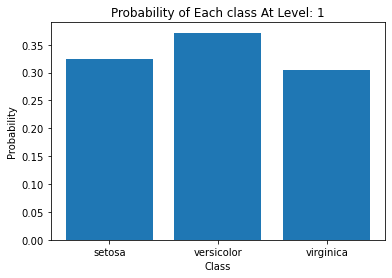

Splitting on feature:  petal_length  with MCR:  32

Level  1
Count of 0 = 34
Reached Leaf Node 

Level  1
Count of 1 = 7
Reached Leaf Node 

Level  1
count of 1  = 32
count of 2  = 15


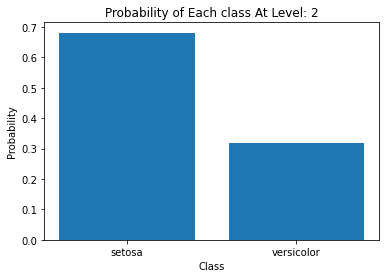

Splitting on feature:  petal_width  with MCR:  7

Level  2
Count of 1 = 1
Reached Leaf Node 

Level  2
Count of 2 = 8
Reached Leaf Node 

Level  1
Count of 2 = 17
Reached Leaf Node 


---------------------------------------------------------
Total loss:  0.0953101798043249  with dept of tree:  2
---------------------------------------------------------
###################--- Building tree with dept:  2  ---End -- ############


#########-- Start --- Building tree with dept:  3  --- ###################

Level  0
count of 0  = 34
count of 1  = 39
count of 2  = 32


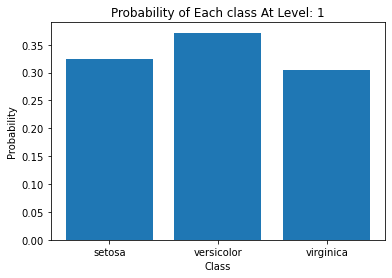

Splitting on feature:  petal_length  with MCR:  32

Level  1
Count of 0 = 34
Reached Leaf Node 

Level  1
Count of 1 = 7
Reached Leaf Node 

Level  1
count of 1  = 32
count of 2  = 15


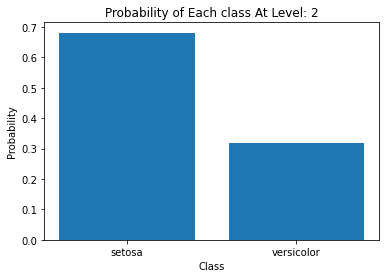

Splitting on feature:  petal_width  with MCR:  7

Level  2
Count of 1 = 1
Reached Leaf Node 

Level  2
count of 1  = 31
count of 2  = 7


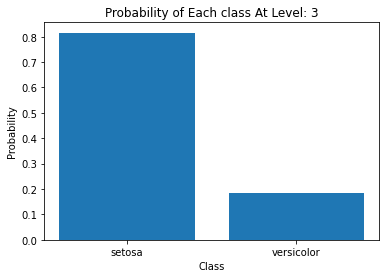

Splitting on feature:  sepal_length  with MCR:  7

Level  3
Count of 1 = 13
Reached Leaf Node 

Level  3
Count of 1 = 2
Reached Leaf Node 

Level  2
Count of 2 = 8
Reached Leaf Node 

Level  1
Count of 2 = 17
Reached Leaf Node 


---------------------------------------------------------
Total loss:  2.3978952727983707  with dept of tree:  3
---------------------------------------------------------
###################--- Building tree with dept:  3  ---End -- ############


#########-- Start --- Building tree with dept:  4  --- ###################

Level  0
count of 0  = 34
count of 1  = 39
count of 2  = 32


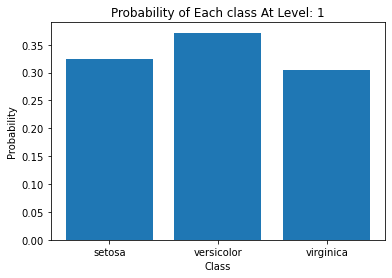

Splitting on feature:  petal_length  with MCR:  32

Level  1
Count of 0 = 34
Reached Leaf Node 

Level  1
Count of 1 = 7
Reached Leaf Node 

Level  1
count of 1  = 32
count of 2  = 15


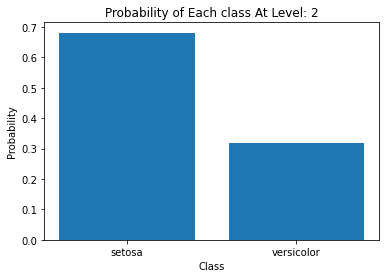

Splitting on feature:  petal_width  with MCR:  7

Level  2
Count of 1 = 1
Reached Leaf Node 

Level  2
count of 1  = 31
count of 2  = 7


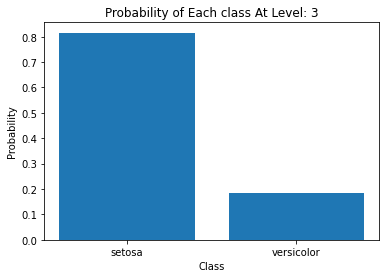

Splitting on feature:  sepal_length  with MCR:  7

Level  3
Count of 1 = 13
Reached Leaf Node 

Level  3
count of 1  = 16
count of 2  = 7


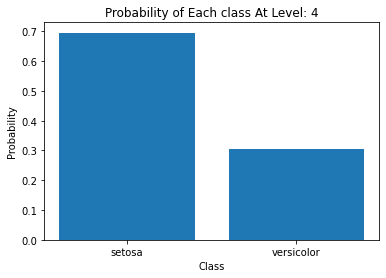

Splitting on feature:  sepal_width  with MCR:  7

Level  4
Count of 1 = 3
Reached Leaf Node 

Level  3
Count of 1 = 2
Reached Leaf Node 

Level  2
Count of 2 = 8
Reached Leaf Node 

Level  1
Count of 2 = 17
Reached Leaf Node 


---------------------------------------------------------
Total loss:  2.3978952727983707  with dept of tree:  4
---------------------------------------------------------
###################--- Building tree with dept:  4  ---End -- ############




In [33]:
tree = []
for j in range(1,5):
    print("#########-- Start --- Building tree with dept: ", j , " --- ###################\n")
    tree = DT_MCR(train, train, train.columns[:-1], max_dept=j) # Build decision tree with specific dept
    
    
    ###Calculating cross entropy of the decision tree with specific dept on validation set
    uniq_vals =  validate['target'].unique()
    total_loss = 0
    for val in uniq_vals:
        data_val = validate[validate['target']==val]
        predictions = []
        try:
            for index, row in data_val.iterrows():
                predictions.append(myprint(tree, row,0))
        except:
            predictions.append(0)
            
        correct_predictions_num = predictions.count(val)
        loss = -1* (np.log(correct_predictions_num/len(data_val))) 
        total_loss  = total_loss + loss ### total loss is equal to sum of each individual unique class loss
        
    print("\n---------------------------------------------------------")
    print("Total loss: ", total_loss, " with dept of tree: ", j)
    print("---------------------------------------------------------")

    print("###################--- Building tree with dept: ", j , " ---End -- ############\n\n")

    

#### Above results show that we get minimum loss on validation set if tree dept =2 .

In [34]:
tree

{'petal_length': {'a': 0,
  'b': 1,
  'c': {'petal_width': {'b': 1,
    'c': {'sepal_length': {'b': 1,
      'c': {'sepal_width': {'a': 1, 'b': 1, 'c': 1}},
      'd': 1}},
    'd': 2}},
  'd': 2}}

### Test Loss

In [35]:
###Calculating cross entropy of the decision tree with specific dept on test set
uniq_vals =  test['target'].unique()
total_loss = 0

for val in uniq_vals:
    data_val = test[test['target']==val]
    predictions = []
    try:
        for index, row in data_val.iterrows():
            predictions.append(myprint(tree, row,0))
    except:
        predictions.append(0)

    correct_predictions_num = predictions.count(val)
    loss = -1* (np.log(correct_predictions_num/len(test))) 
    total_loss  = total_loss + loss ### total loss is equal to sum of each individual unique class loss

print("\n---------------------------------------------------")
print("Test loss: ", total_loss)
print("---------------------------------------------------")


---------------------------------------------------
Test loss:  3.301865520284485
---------------------------------------------------


<hr style="border:2px solid gray"> </hr>

# Exercise 1: Part B) Experimenting with other Quality-criterion

### Helper Functions

### Function to calculate entropy

In [38]:
def Entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy=0
    for i in range(len(elements)):
        entropy += (-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))
    
    return entropy

### Function to calculate gain

In [39]:
def gain(data,s_feature,target_feature):       
        n_entropy = 0
        vals,counts= np.unique(data[s_feature],return_counts=True)
        for i in range(len(vals)):
            k=Entropy(data.where(data[s_feature]==vals[i]).dropna()[target_feature])
            n_entropy += (counts[i]/np.sum(counts))*k
        return n_entropy

### Function to calculate Information gain 

In [40]:
def Infogain(df,s_feature,y):
    total_entropy = Entropy(df[y])
    Information_Gain = total_entropy - gain(df,s_feature,y)
    return Information_Gain

### Now we will use Information Gain as quality criteria of tree split. 

In [41]:
def DT_Gain(data, originaldata, features, max_dept, target_feature="target", parent = None, level=0): 
    
 
    if (len(np.unique(data[target_feature])) <= 1):   # checking if all the values are same if yes then we reached at a leaf
    
        elements,counts = np.unique(data[target_feature],return_counts = True)
        print('Level ',level)
        if elements ==0 :
            print('Count of 0 =',np.sum(counts))
        elif elements ==1 :
            print('Count of 1 =',np.sum(counts))
        elif elements ==2 :
            print('Count of 2 =',np.sum(counts))
        print('Current Entropy is =',Entropy(data[target_feature]))
        print('Reached Leaf Node ')
        print()
        return np.unique(data[target_feature])[0]
    
    elif len(data) == 0:###checking the data is empty or not
       
        return np.unique(orignaldata[target_feature])[0]
    
    elif len(features) == 0 :
        
        return parent[0]
    elif level==max_dept:
        c = Counter(data[target_feature])
        return c.most_common(1)[0][0]
    
    else :

        P_node = np.unique(data[target_feature])### put all the uniqe values of target in parent node
        
        values = []
        for ftr in features : ### loop over all the features
            v = Infogain(data,ftr,target_feature) ### getting list of information gain of all features
            values.append(v)
        
        best_feature_index = np.argmax(values)### taking out the index of the feture which contains max information gain
        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}### Dictionaris to save my actual tree                       
        elements,counts = np.unique(data[target_feature],return_counts = True)
        print('Level ',level)                                      
        for i in range(len(elements)):
            if elements[i]==0 :
                print('count of 0  =',counts[i])
            elif elements[i]==1 :
                print('count of 1  =',counts[i])
            elif elements[i]==2 :
                print('count of 2  =',counts[i])
                
        plt.bar(elements, counts/len(data))
        plt.xticks(elements, ['setosa','versicolor','virginica'])
        plt.xlabel('Class')
        plt.ylabel('Probability')
        title = 'Probability of Each class At Level: ' + str(level+1)
        plt.title(title)
        
        plt.show()
      
        print('Splitting on feature ',best_feature,' with Gain  ',np.max(values) )
        
        print()
        
        
        new_features = features                      
        features=[]
        for i in new_features : ###process to remove the feature from feature list after split                   
                                                  
            if i != best_feature :                  
                features.append(i)
        level += 1       
        new_features=None                          
        
        for vals in np.unique(data[best_feature]):###recursion of all diffrent values in that splitting feature
            
            value = vals
            sub_data = (data[data[best_feature] == value]).dropna()
            
            subtree = DT_Gain(sub_data, data, features, max_dept , target_feature, P_node, level)
            tree[best_feature][value] = subtree
            
        return tree 

### Build decision trees with different depts, Infomation gain as quality criteria and test it on validation set 

In [42]:
df = load_dataset()
train,validate,test = split(df, st=0)

#########-- Start --- Building tree with dept:  1  --- ###################

Level  0
count of 0  = 33
count of 1  = 34
count of 2  = 38


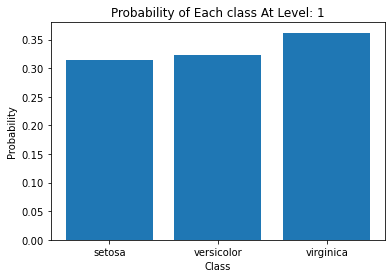

Splitting on feature  petal_width  with Gain   1.2149272978329295

Level  1
Count of 0 = 33
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 1 = 6
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 2 = 24
Current Entropy is = 0.0
Reached Leaf Node 


---------------------------------------------------------
Total loss:  0.15415067982725836  with dept of tree:  1
---------------------------------------------------------
###################--- Building tree with dept:  1  ---End -- ############


#########-- Start --- Building tree with dept:  2  --- ###################

Level  0
count of 0  = 33
count of 1  = 34
count of 2  = 38


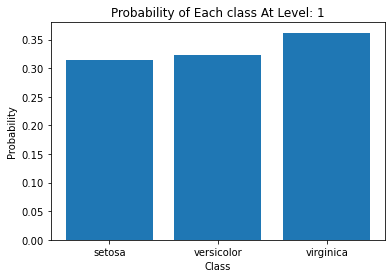

Splitting on feature  petal_width  with Gain   1.2149272978329295

Level  1
Count of 0 = 33
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 1 = 6
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
count of 1  = 28
count of 2  = 14


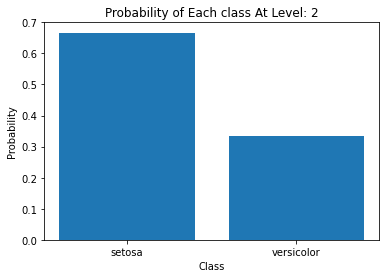

Splitting on feature  petal_length  with Gain   0.32447941525223567

Level  2
Count of 1 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  2
Count of 2 = 7
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 2 = 24
Current Entropy is = 0.0
Reached Leaf Node 


---------------------------------------------------------
Total loss:  0.0  with dept of tree:  2
---------------------------------------------------------
###################--- Building tree with dept:  2  ---End -- ############


#########-- Start --- Building tree with dept:  3  --- ###################

Level  0
count of 0  = 33
count of 1  = 34
count of 2  = 38


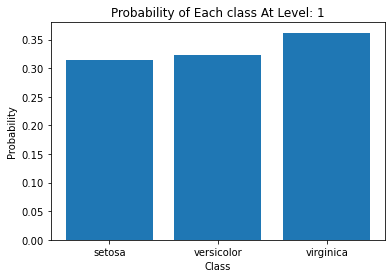

Splitting on feature  petal_width  with Gain   1.2149272978329295

Level  1
Count of 0 = 33
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 1 = 6
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
count of 1  = 28
count of 2  = 14


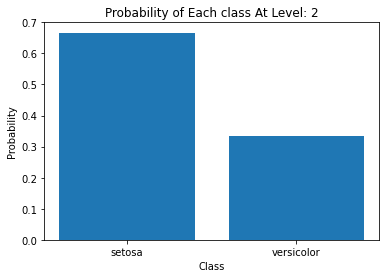

Splitting on feature  petal_length  with Gain   0.32447941525223567

Level  2
Count of 1 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  2
count of 1  = 27
count of 2  = 7


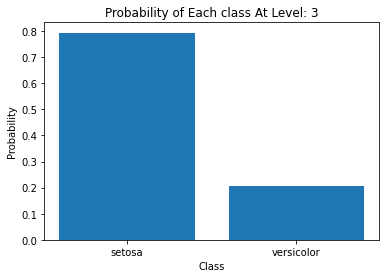

Splitting on feature  sepal_length  with Gain   0.20043404852339441

Level  3
Count of 2 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
Count of 1 = 10
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
Count of 1 = 2
Current Entropy is = 0.0
Reached Leaf Node 

Level  2
Count of 2 = 7
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 2 = 24
Current Entropy is = 0.0
Reached Leaf Node 


---------------------------------------------------------
Total loss:  0.0  with dept of tree:  3
---------------------------------------------------------
###################--- Building tree with dept:  3  ---End -- ############


#########-- Start --- Building tree with dept:  4  --- ###################

Level  0
count of 0  = 33
count of 1  = 34
count of 2  = 38


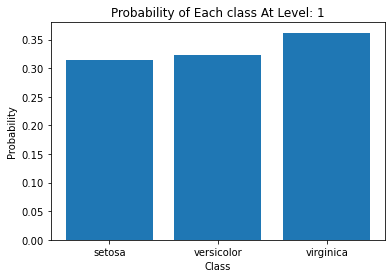

Splitting on feature  petal_width  with Gain   1.2149272978329295

Level  1
Count of 0 = 33
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 1 = 6
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
count of 1  = 28
count of 2  = 14


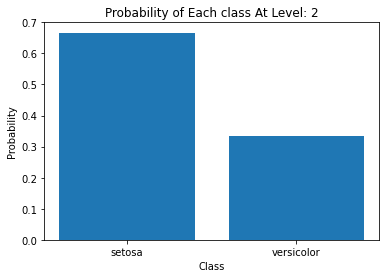

Splitting on feature  petal_length  with Gain   0.32447941525223567

Level  2
Count of 1 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  2
count of 1  = 27
count of 2  = 7


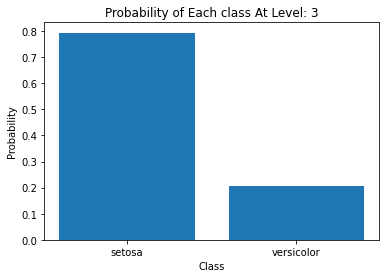

Splitting on feature  sepal_length  with Gain   0.20043404852339441

Level  3
Count of 2 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
Count of 1 = 10
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
count of 1  = 15
count of 2  = 6


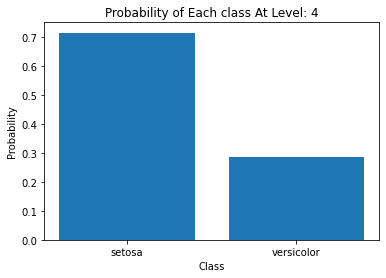

Splitting on feature  sepal_width  with Gain   0.1119568775753289

Level  4
Count of 1 = 4
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
Count of 1 = 2
Current Entropy is = 0.0
Reached Leaf Node 

Level  2
Count of 2 = 7
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 2 = 24
Current Entropy is = 0.0
Reached Leaf Node 


---------------------------------------------------------
Total loss:  0.0  with dept of tree:  4
---------------------------------------------------------
###################--- Building tree with dept:  4  ---End -- ############




In [44]:
tree = []
for j in range(1,5):
    
    print("#########-- Start --- Building tree with dept: ", j , " --- ###################\n")
    tree = DT_Gain(train, train, train.columns[:-1], max_dept=j) # Build decision tree with specific dept
    
    
    ###Calculating cross entropy of the decision tree with specific dept on validation set
    uniq_vals =  validate['target'].unique()
    total_loss = 0
    for val in uniq_vals:
        data_val = validate[validate['target']==val]
        predictions = []
        try:
            for index, row in data_val.iterrows():
                predictions.append(myprint(tree, row,0))
        except:
            predictions.append(0)
            
        correct_predictions_num = predictions.count(val)
        loss = -1* (np.log(correct_predictions_num/len(data_val))) 
        total_loss  = total_loss + loss ### total loss is equal to sum of each individual unique class loss
        
    print("\n---------------------------------------------------------")
    print("Total loss: ", total_loss, " with dept of tree: ", j)
    print("---------------------------------------------------------")

    print("###################--- Building tree with dept: ", j , " ---End -- ############\n\n")

#### Above results show that we get minimum loss on validation set if tree dept >=2 . So we can use that last build which is of dept 4 to predict on test set .

In [45]:
### dept 4 tree
tree

{'petal_width': {'a': 0,
  'b': 1,
  'c': {'petal_length': {'b': 1,
    'c': {'sepal_length': {'a': 2,
      'b': 1,
      'c': {'sepal_width': {'a': 1, 'b': 1, 'c': 1}},
      'd': 1}},
    'd': 2}},
  'd': 2}}

### Test Loss

In [46]:
###Calculating cross entropy of the decision tree with specific dept on test set
uniq_vals =  test['target'].unique()
total_loss = 0

for val in uniq_vals:
    data_val = test[test['target']==val]
    predictions = []
    try:
        for index, row in data_val.iterrows():
            predictions.append(myprint(tree, row,0))
    except:
        predictions.append(0)

    correct_predictions_num = predictions.count(val)
    loss = -1* (np.log(correct_predictions_num/len(test))) 
    total_loss  = total_loss + loss ### total loss is equal to sum of each individual unique class loss

print("\n---------------------------------------------------")
print("Test loss: ", total_loss)
print("---------------------------------------------------")


---------------------------------------------------
Test loss:  3.6101668799390016
---------------------------------------------------


#### When we used  Misclassification Rate (MCR) as a quality-criterion, then loss on validation set is higher with each increase in tree dept as compared to information gain as a quality-criterion where loss on validation set reduces with increase in tree dept